## Compulsory Task 1

In [275]:
# Importing necessary modules.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [276]:
# Reading data from 'Iris.csv' file and storing into a dataframe.
df = pd.read_csv('Iris.csv', encoding='unicode_escape')

# Displaying first 5 rows of dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The independent and dependent variables are identified below:

Independent Variables (X-variables)
* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

Dependent Variables (Y-Variable)
* Species

In [277]:
# Creating a new column in dataframe which is to contain the encoded values for dependent variables.
df['Species (encoded)'] = 0

# If specie value is 'Iris-setosa', the encoded value for this observation is 0. 
# For any of the other classes that are Not 'Iris-setosa', the encoded value for these observations are 1. 
for count, specie in enumerate(df['Species'].values):
    if specie == "Iris-setosa":
        df['Species (encoded)'].loc[count] = 0
    elif specie == "Iris-virginica" or specie == "Iris-versicolor":
        df['Species (encoded)'].loc[count] = 1

# Dataframe is displayed showing the encoded values.
df

/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_32970/640979363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species (encoded)'].loc[count] = 0
/var/folders/tf/jb3kbn_x7yn1kh8xwwzcqrbc0000gn/T/ipykernel_32970/640979363.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species (encoded)'].loc[count] = 1


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species (encoded)
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


In [278]:
# Setting our independent variables previously identified as our x-values.
# Setting the dependent variable as the y-values.
x = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,6].values

# Reshaping x-variable based on the number of features to allow for compatibility.
X = x.reshape(-1,4)
Y = y.reshape(-1,1)

# Splitting data into training and test sets in the ratio 80:20. 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, stratify=y)

print(f"Training Set Size:  {x_train.shape} {y_train.shape}")
print(f"Test Set Size:  {x_test.shape} {y_test.shape}")

Training Set Size:  (120, 4) (120, 1)
Test Set Size:  (30, 4) (30, 1)


In [279]:
# Using logistic regression function to fit a model & make predictions on test set.
model = LogisticRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test).reshape(-1,1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot: >

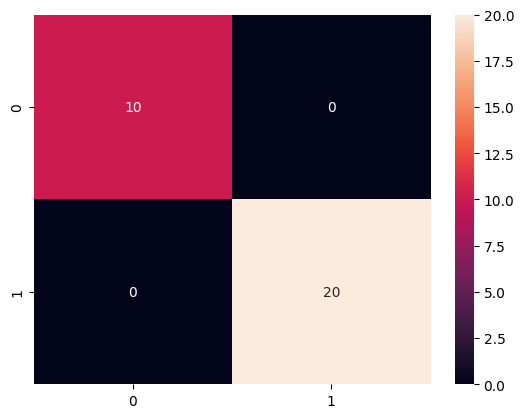

In [280]:
# Plotting confusion matrix, displaying predictions against true labels.
cm = confusion_matrix(y_test ,y_prediction)
sns.heatmap(cm, annot=True)


All the 'Iris-setosa' (encoding=0) were all predicted correctly.
All 'Not Iris-setosa' (encoding=1) were all predicted correctly.

As there are no false positive/false negative results, I am expecting a high precision and a high recall value.

In [281]:
# Calculating Accuracy, Precision & Recall to verify if prediction is correct.
TP = cm[0][0] # True Positive
FN = cm[0][1] # False Negative
FP = cm[1][0] # False Positive
TN = cm[1][1] # True Negative

# Accuracy
acc = (TP+TN)/(TP+FN+TN+FP)

# Precision:
prec = TP/(TP+FP)

# Recall: 
rec = TP/(TP+FN)

print(f'''
Model Performance Metrics
Accuracy: \t {acc}
Precision: \t {prec}
Recall: \t {rec}
''')


Model Performance Metrics
Accuracy: 	 1.0
Precision: 	 1.0
Recall: 	 1.0



Model scored 100% on all three metrics, proving that my prediction was correct!